In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb

from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv()

True

## Portfolio weights

Define portfolio weights, that have been calculated in portfolio_optimization.ipynb.

In [2]:
assets = ["UBS", "AAPL", "PFE", "AMZN", "META", "TSLA", "NVDA", "XOM", "MSFT", "KO"]
weights = [0.1333, 0.1590, 0.0005, 0.0523, 0.1593, 0.1818, 0.1964, 0.0036, 0.0920, 0.0218]

assert(sum(weights) == 1.0) 

In [3]:
db_name = os.getenv("db_name")
db_user = os.getenv("db_user")
db_password = os.getenv("db_password")
db_host = os.getenv("db_host")

engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}/{db_name}')

query = f"""SELECT * FROM StockPrice WHERE ticker IN ({', '.join([f"'{asset}'" for asset in assets])});"""

df = pd.read_sql(query, engine)

In [4]:
df = df.set_index("date", drop=True)
df.head()

,ticker,open,high,low,close,volume,dividends,splits
date,,,,,,,,
2019-09-24,UBS,9.63,9.64,9.51,9.53,2837300,0.0,0.0
2019-09-25,UBS,9.44,9.53,9.43,9.53,2324200,0.0,0.0
2019-09-26,UBS,9.50,9.56,9.49,9.51,1889000,0.0,0.0
2019-09-27,UBS,9.59,9.64,9.54,9.60,1893500,0.0,0.0
2019-09-30,UBS,9.66,9.67,9.59,9.59,1829100,0.0,0.0


In [5]:
df_ts = df.pivot_table(values='close', index=df.index, columns='ticker')[:-1]
df_ts = df_ts.ffill()
df_ts = df_ts[assets]
df_ts

ticker,UBS,AAPL,PFE,AMZN,META,TSLA,NVDA,XOM,MSFT,KO
date,,,,,,,,,,
2019-09-24,9.53,52.66,27.74,87.08,180.74,14.88,4.29,55.61,131.22,46.51
2019-09-25,9.53,53.47,27.66,88.42,182.25,15.25,4.43,55.77,133.11,46.40
2019-09-26,9.51,53.19,27.56,86.99,179.57,16.17,4.41,55.47,133.28,46.59
2019-09-27,9.60,52.93,27.90,86.27,176.57,16.14,4.27,55.87,131.55,46.52
2019-09-30,9.59,54.18,27.68,86.80,177.55,16.06,4.33,55.19,132.79,46.63
...,...,...,...,...,...,...,...,...,...,...
2024-09-16,29.79,216.32,30.07,184.89,533.28,226.78,116.78,112.71,431.34,72.10
2024-09-17,29.76,216.79,29.83,186.88,536.32,227.87,115.59,114.18,435.15,71.80
2024-09-18,29.91,220.69,29.75,186.43,537.95,227.20,113.37,114.58,430.81,71.75


In [6]:
df_log_returns = np.log1p(df_ts.pct_change())
df_log_returns

ticker,UBS,AAPL,PFE,AMZN,META,TSLA,NVDA,XOM,MSFT,KO
date,,,,,,,,,,
2019-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-25,0.000000,0.015265,-0.002888,0.015271,0.008320,0.024561,0.032113,0.002873,0.014301,-0.002368
2019-09-26,-0.002101,-0.005250,-0.003622,-0.016305,-0.014814,0.058578,-0.004525,-0.005394,0.001276,0.004086
2019-09-27,0.009419,-0.004900,0.012261,-0.008311,-0.016848,-0.001857,-0.032261,0.007185,-0.013065,-0.001504
2019-09-30,-0.001042,0.023342,-0.007917,0.006125,0.005535,-0.004969,0.013954,-0.012246,0.009382,0.002362
...,...,...,...,...,...,...,...,...,...,...
2024-09-16,0.006736,-0.028168,0.026965,-0.008617,0.017326,-0.015359,-0.019672,0.013938,0.001740,0.009616
2024-09-17,-0.001008,0.002170,-0.008013,0.010706,0.005684,0.004795,-0.010242,0.012958,0.008794,-0.004170
2024-09-18,0.005028,0.017830,-0.002685,-0.002411,0.003035,-0.002945,-0.019393,0.003497,-0.010024,-0.000697


In [7]:
df_returns = df_log_returns.copy()

## Calculation of returns

In [8]:
df_returns["daily_log_returns"] = np.sum(df_log_returns * weights, axis=1)
df_returns["cumsum_log_returns"] = df_returns["daily_log_returns"].cumsum()
df_returns['daily_discrete_returns'] = np.exp(df_returns['daily_log_returns']) - 1
df_returns

ticker,UBS,AAPL,PFE,AMZN,META,TSLA,NVDA,XOM,MSFT,KO,daily_log_returns,cumsum_log_returns,daily_discrete_returns
date,,,,,,,,,,,,,
2019-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2019-09-25,0.000000,0.015265,-0.002888,0.015271,0.008320,0.024561,0.032113,0.002873,0.014301,-0.002368,0.016596,0.016596,0.016735
2019-09-26,-0.002101,-0.005250,-0.003622,-0.016305,-0.014814,0.058578,-0.004525,-0.005394,0.001276,0.004086,0.005619,0.022215,0.005634
2019-09-27,0.009419,-0.004900,0.012261,-0.008311,-0.016848,-0.001857,-0.032261,0.007185,-0.013065,-0.001504,-0.010518,0.011696,-0.010463
2019-09-30,-0.001042,0.023342,-0.007917,0.006125,0.005535,-0.004969,0.013954,-0.012246,0.009382,0.002362,0.007478,0.019175,0.007506
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-16,0.006736,-0.028168,0.026965,-0.008617,0.017326,-0.015359,-0.019672,0.013938,0.001740,0.009616,-0.007494,1.854062,-0.007466
2024-09-17,-0.001008,0.002170,-0.008013,0.010706,0.005684,0.004795,-0.010242,0.012958,0.008794,-0.004170,0.001297,1.855359,0.001298
2024-09-18,0.005028,0.017830,-0.002685,-0.002411,0.003035,-0.002945,-0.019393,0.003497,-0.010024,-0.000697,-0.001408,1.853951,-0.001407


Define a benchmark using equal weights.

In [9]:
df_returns["bench_daily_log_returns"] = np.sum(df_log_returns * (1/df_ts.shape[1]), axis=1)
df_returns["bench_cumsum_log_returns"] = df_returns["bench_daily_log_returns"].cumsum()
df_returns['bench_daily_discrete_returns'] = np.exp(df_returns['bench_daily_log_returns']) - 1
df_returns

ticker,UBS,AAPL,PFE,AMZN,META,TSLA,NVDA,XOM,MSFT,KO,daily_log_returns,cumsum_log_returns,daily_discrete_returns,bench_daily_log_returns,bench_cumsum_log_returns,bench_daily_discrete_returns
date,,,,,,,,,,,,,,,,
2019-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-25,0.000000,0.015265,-0.002888,0.015271,0.008320,0.024561,0.032113,0.002873,0.014301,-0.002368,0.016596,0.016596,0.016735,0.010745,0.010745,0.010803
2019-09-26,-0.002101,-0.005250,-0.003622,-0.016305,-0.014814,0.058578,-0.004525,-0.005394,0.001276,0.004086,0.005619,0.022215,0.005634,0.001193,0.011938,0.001194
2019-09-27,0.009419,-0.004900,0.012261,-0.008311,-0.016848,-0.001857,-0.032261,0.007185,-0.013065,-0.001504,-0.010518,0.011696,-0.010463,-0.004988,0.006950,-0.004976
2019-09-30,-0.001042,0.023342,-0.007917,0.006125,0.005535,-0.004969,0.013954,-0.012246,0.009382,0.002362,0.007478,0.019175,0.007506,0.003453,0.010402,0.003458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-16,0.006736,-0.028168,0.026965,-0.008617,0.017326,-0.015359,-0.019672,0.013938,0.001740,0.009616,-0.007494,1.854062,-0.007466,0.000451,1.283103,0.000451
2024-09-17,-0.001008,0.002170,-0.008013,0.010706,0.005684,0.004795,-0.010242,0.012958,0.008794,-0.004170,0.001297,1.855359,0.001298,0.002167,1.285271,0.002170
2024-09-18,0.005028,0.017830,-0.002685,-0.002411,0.003035,-0.002945,-0.019393,0.003497,-0.010024,-0.000697,-0.001408,1.853951,-0.001407,-0.000876,1.284394,-0.000876


Portfolio mean daily return was 0.17% with a max of 12.12% and min of -15.30%.

In [10]:
df_returns["daily_discrete_returns"].describe()

count    1257.000000
mean        0.001722
std         0.021134
min        -0.152959
25%        -0.008657
50%         0.002290
75%         0.012930
max         0.121185
Name: daily_discrete_returns, dtype: float64

Benchmark mean daily return was slightly lower at 0.12% with a mean of 9.75%.

In [11]:
df_returns["bench_daily_discrete_returns"].describe()

count    1257.000000
mean        0.001166
std         0.016064
min        -0.124964
25%        -0.006135
50%         0.001668
75%         0.009439
max         0.097535
Name: bench_daily_discrete_returns, dtype: float64

## Drawdown

In [12]:
df_returns['cumulative_return'] = (1 + df_returns['daily_discrete_returns']).cumprod()
df_returns['cumulative_peak'] = df_returns['cumulative_return'].cummax()
df_returns['drawdown'] = (df_returns['cumulative_peak'] - df_returns['cumulative_return']) / df_returns['cumulative_peak']

df_returns['bench_cumulative_return'] = (1 + df_returns['bench_daily_discrete_returns']).cumprod()
df_returns['bench_cumulative_peak'] = df_returns['bench_cumulative_return'].cummax()
df_returns['bench_drawdown'] = (df_returns['bench_cumulative_peak'] - df_returns['bench_cumulative_return']) / df_returns['bench_cumulative_peak']

df_returns

ticker,UBS,AAPL,PFE,AMZN,META,TSLA,NVDA,XOM,MSFT,KO,...,daily_discrete_returns,bench_daily_log_returns,bench_cumsum_log_returns,bench_daily_discrete_returns,cumulative_return,cumulative_peak,drawdown,bench_cumulative_return,bench_cumulative_peak,bench_drawdown
date,,,,,,,,,,,,,,,,,,,,,
2019-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
2019-09-25,0.000000,0.015265,-0.002888,0.015271,0.008320,0.024561,0.032113,0.002873,0.014301,-0.002368,...,0.016735,0.010745,0.010745,0.010803,1.016735,1.016735,0.000000,1.010803,1.010803,0.000000
2019-09-26,-0.002101,-0.005250,-0.003622,-0.016305,-0.014814,0.058578,-0.004525,-0.005394,0.001276,0.004086,...,0.005634,0.001193,0.011938,0.001194,1.022463,1.022463,0.000000,1.012009,1.012009,0.000000
2019-09-27,0.009419,-0.004900,0.012261,-0.008311,-0.016848,-0.001857,-0.032261,0.007185,-0.013065,-0.001504,...,-0.010463,-0.004988,0.006950,-0.004976,1.011765,1.022463,0.010463,1.006974,1.012009,0.004976
2019-09-30,-0.001042,0.023342,-0.007917,0.006125,0.005535,-0.004969,0.013954,-0.012246,0.009382,0.002362,...,0.007506,0.003453,0.010402,0.003458,1.019360,1.022463,0.003036,1.010457,1.012009,0.001534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-16,0.006736,-0.028168,0.026965,-0.008617,0.017326,-0.015359,-0.019672,0.013938,0.001740,0.009616,...,-0.007466,0.000451,1.283103,0.000451,6.385703,6.912844,0.076255,3.607819,3.725429,0.031569
2024-09-17,-0.001008,0.002170,-0.008013,0.010706,0.005684,0.004795,-0.010242,0.012958,0.008794,-0.004170,...,0.001298,0.002167,1.285271,0.002170,6.393991,6.912844,0.075056,3.615647,3.725429,0.029468
2024-09-18,0.005028,0.017830,-0.002685,-0.002411,0.003035,-0.002945,-0.019393,0.003497,-0.010024,-0.000697,...,-0.001407,-0.000876,1.284394,-0.000876,6.384997,6.912844,0.076358,3.612480,3.725429,0.030318


In [13]:
max_drawdown = df_returns['drawdown'].max()

print(f"Max Drawdown: {max_drawdown:.2%}")

Max Drawdown: 48.73%


Max drawdown of the portfolio was 48.73%.

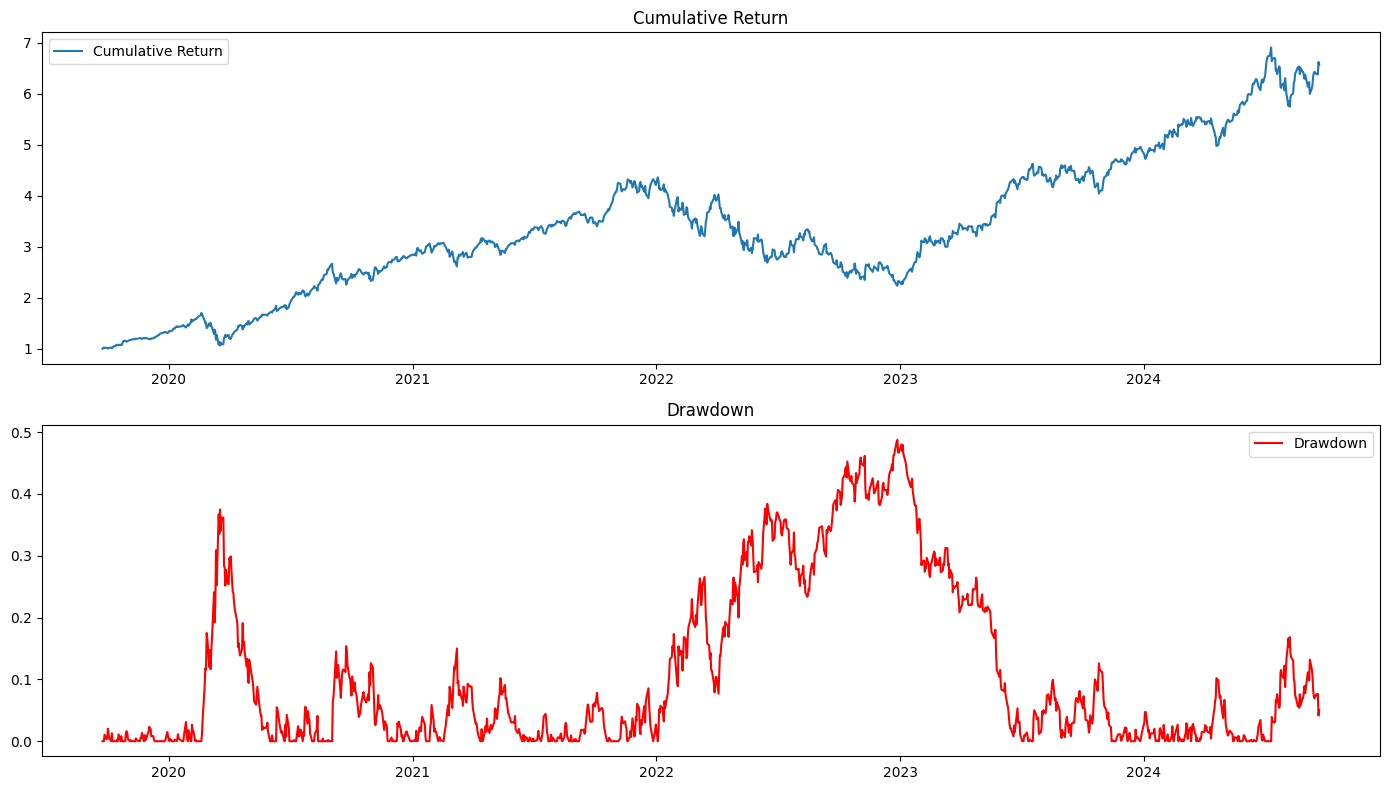

In [14]:
# Plotting der kumulierten Renditen und des Drawdowns
plt.figure(figsize=(14, 8))

# Plot der kumulierten Renditen
plt.subplot(2, 1, 1)
plt.plot(df_returns['cumulative_return'], label='Cumulative Return')
plt.title('Cumulative Return')
plt.legend()

# Plot des Drawdowns
plt.subplot(2, 1, 2)
plt.plot(df_returns['drawdown'], label='Drawdown', color='red')
plt.title('Drawdown')
plt.legend()

plt.tight_layout()
plt.show()

## Plot relative Performance

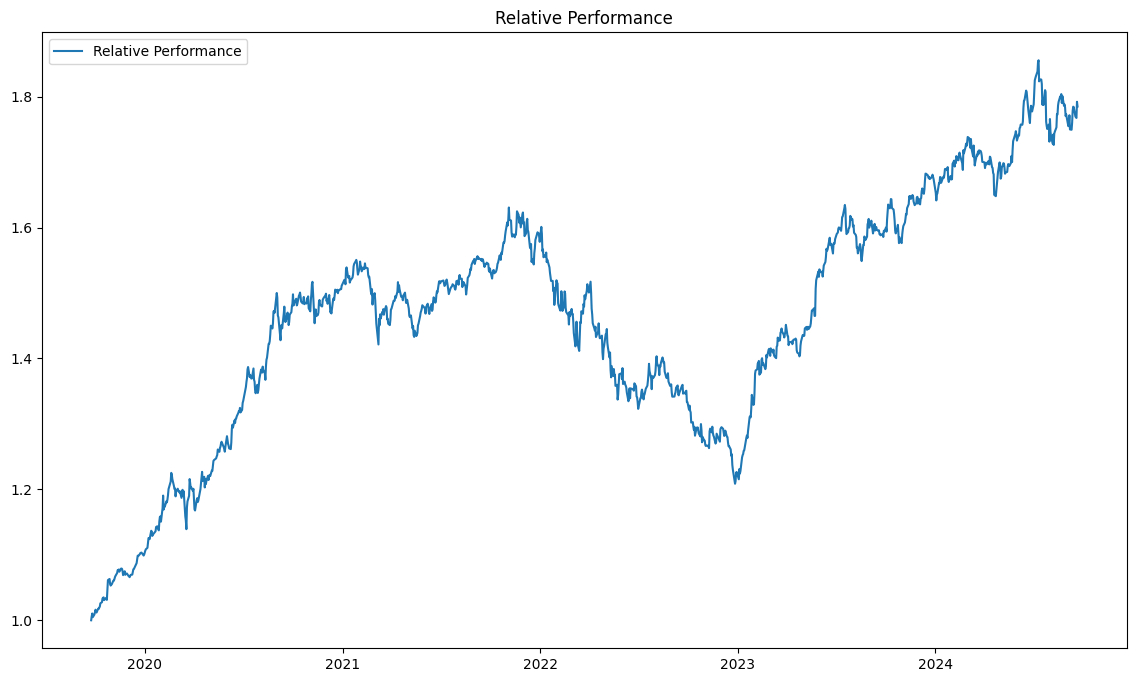

In [15]:
# Plotting der kumulierten Renditen und des Drawdowns
plt.figure(figsize=(14, 8))

# Plot der kumulierten Renditen
plt.plot(df_returns['cumulative_return'] / df_returns["bench_cumulative_return"], label='Relative Performance')
plt.title('Relative Performance')
plt.legend()

plt.show()

## Value at Risk (VaR)

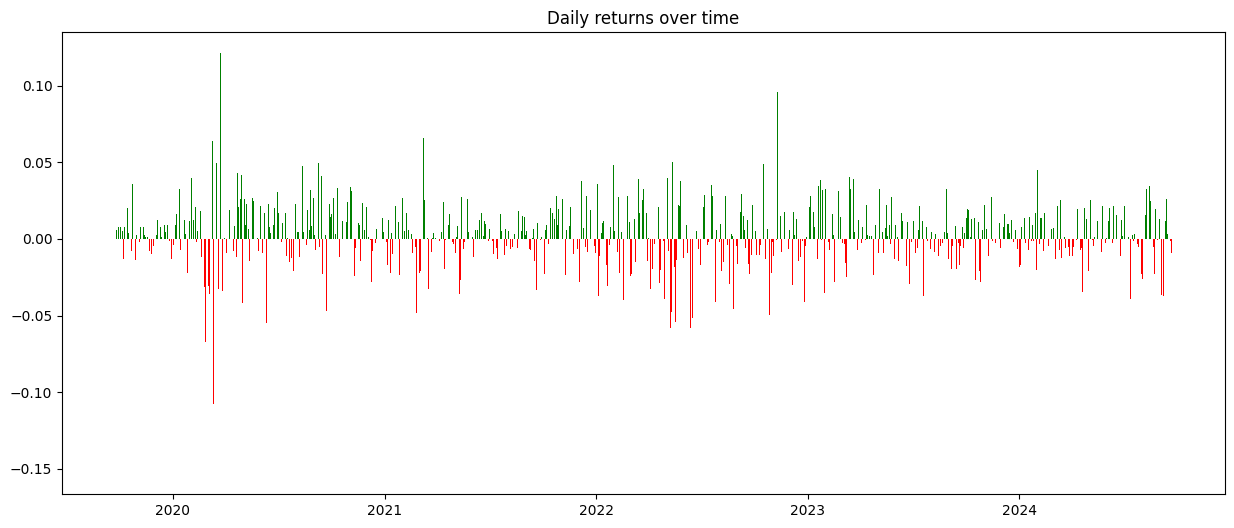

In [16]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(df_returns.index, df_returns["daily_discrete_returns"],
       color=np.where(df_returns["daily_discrete_returns"] < 0, 'red', 'green'))

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=0)

plt.title('Daily returns over time')


plt.show()

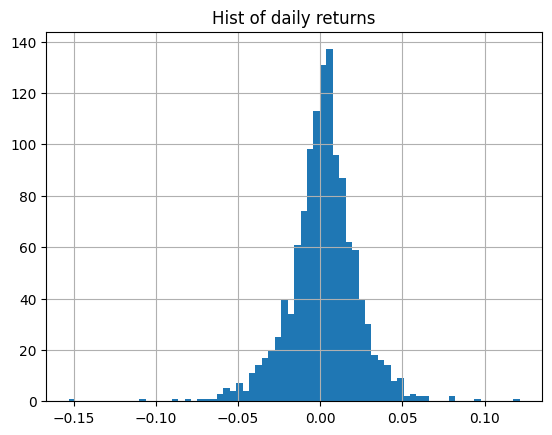

In [17]:
df_returns["daily_discrete_returns"].hist(bins=70)
plt.title('Hist of daily returns')

plt.show()

### Historical VaR

Based on historical returns

In [18]:
trading_days_per_year = 250

hist_var_95 = df_returns["daily_discrete_returns"].quantile(0.05, interpolation="lower")
hist_var_99 = df_returns["daily_discrete_returns"].quantile(0.01, interpolation="lower")

print(f"Historischer täglicher VaR (95%): {hist_var_95:.4f}")
print(f"Historischer annualisierter VaR (95%): {hist_var_95 * np.sqrt(trading_days_per_year):.4f}")

print(f"Historischer täglicher VaR (99%): {hist_var_99:.4f}")
print(f"Historischer annualisierter VaR (99%): {hist_var_99 * np.sqrt(trading_days_per_year):.4f}")

Historischer täglicher VaR (95%): -0.0340
Historischer annualisierter VaR (95%): -0.5373
Historischer täglicher VaR (99%): -0.0569
Historischer annualisierter VaR (99%): -0.8998


## Calculated VaR

Based on mean and std of returns.

In [19]:
mean_returns = df_returns['daily_discrete_returns'].mean()
std_returns = df_returns['daily_discrete_returns'].std()

confidence_level = 0.95

z_value = stats.norm.ppf(1 - confidence_level)

daily_var = mean_returns + z_value * std_returns
annual_var = daily_var * np.sqrt(trading_days_per_year)

print(f"Täglicher VaR (95%): {daily_var:.4f}")
print(f"Annualisierter VaR (95%): {annual_var:.4f}")

pdf_z = stats.norm.pdf(z_value)

cvar_parametric = mean_returns + std_returns * (pdf_z / (1 - confidence_level))

annual_cvar_parametric = cvar_parametric * np.sqrt(trading_days_per_year)

print(f"Täglicher CVaR (parametrisch, 95%): {-(cvar_parametric):.4f}")
print(f"Annualisierter CVaR (parametrisch, 95%): {-(annual_cvar_parametric):.4f}")

Täglicher VaR (95%): -0.0330
Annualisierter VaR (95%): -0.5224
Täglicher CVaR (parametrisch, 95%): -0.0453
Annualisierter CVaR (parametrisch, 95%): -0.7165


## Risk Metrics

In [20]:
rf = 0.02 / trading_days_per_year

portfolio_returns = df_returns['daily_discrete_returns']
benchmark_returns = df_returns['bench_daily_discrete_returns']

# 1. Beta und Alpha
beta, alpha, _, _, _ = stats.linregress(benchmark_returns, portfolio_returns)

# Alpha annualisieren
alpha_annual = alpha * 252

# 2. Capture Ratio (Up & Down)
up_capture = portfolio_returns[benchmark_returns > 0].mean() / benchmark_returns[benchmark_returns > 0].mean()
down_capture = portfolio_returns[benchmark_returns < 0].mean() / benchmark_returns[benchmark_returns < 0].mean()

# 3. Tracking Error
tracking_error = np.std(portfolio_returns - benchmark_returns)

# 4. Information Ratio
excess_return = portfolio_returns.mean() - benchmark_returns.mean()
information_ratio = excess_return / tracking_error

# 5. R-squared
r_value = np.corrcoef(portfolio_returns, benchmark_returns)[0, 1]
r_squared = r_value ** 2

# 6. Sharpe Ratio
sharpe_ratio = (portfolio_returns.mean() - rf) / portfolio_returns.std()

# 7. Standardabweichung
std_dev = portfolio_returns.std()

# Ausgabe der Kennzahlen
print(f"Alpha (annualisiert): {alpha_annual:.4f}")
print(f"Beta: {beta:.4f}")
print(f"Up Capture Ratio: {up_capture:.4f}")
print(f"Down Capture Ratio: {down_capture:.4f}")
print(f"Tracking Error: {tracking_error:.4f}")
print(f"Information Ratio: {information_ratio:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Standardabweichung: {std_dev:.4f}")


Alpha (annualisiert): 0.0596
Beta: 1.2740
Up Capture Ratio: 1.3321
Down Capture Ratio: 1.2987
Tracking Error: 0.0069
Information Ratio: 0.0810
R-squared: 0.9378
Sharpe Ratio: 0.0777
Standardabweichung: 0.0211


## Correlation Matrix

ticker       UBS      AAPL       PFE      AMZN      META      TSLA      NVDA  \
ticker                                                                         
UBS     1.000000  0.458976  0.283810  0.355583  0.370189  0.322404  0.411203   
AAPL    0.458976  1.000000  0.287708  0.598817  0.559675  0.499575  0.619314   
PFE     0.283810  0.287708  1.000000  0.170670  0.188813  0.087261  0.155867   
AMZN    0.355583  0.598817  0.170670  1.000000  0.606179  0.434814  0.592757   
META    0.370189  0.559675  0.188813  0.606179  1.000000  0.334422  0.537263   
TSLA    0.322404  0.499575  0.087261  0.434814  0.334422  1.000000  0.487853   
NVDA    0.411203  0.619314  0.155867  0.592757  0.537263  0.487853  1.000000   
XOM     0.495239  0.296693  0.251801  0.145001  0.161511  0.155509  0.193091   
MSFT    0.462882  0.751035  0.320664  0.678906  0.615848  0.461143  0.693986   
KO      0.439151  0.440529  0.422906  0.228651  0.222748  0.175107  0.224460   

ticker       XOM      MSFT        KO  


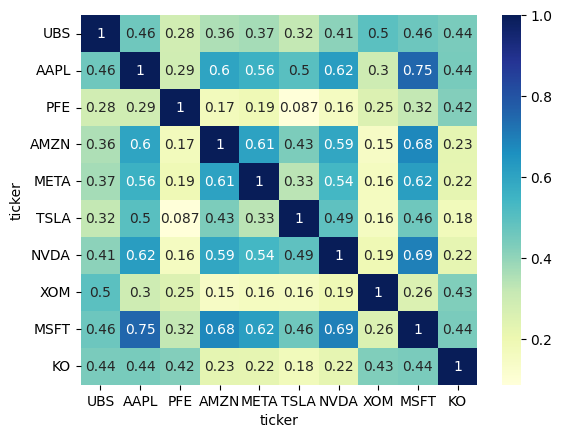

In [21]:
print(df_log_returns.corr(numeric_only=True))

# Plotting correlation heatmap
dataplot = sb.heatmap(df_log_returns.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()
